> **提示**：欢迎参加“调查数据集”项目！引用段会添加这类提示，来帮助你制定调查方法。在你提交项目之前，你可以浏览一下报告，将这一段删除，以保持报告的简洁性。首先，你需要双击该 Markdown 框(cell)，将标题更改为与数据集和调查相关的标题。

# 项目：调查数据集（请用更具体的标题来代替这个标题！）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在报告的这一部分，你需要首先对已选择进行分析的数据集进行简要的介绍。在这一部分末尾，对你计划在报告过程中探索的问题进行描述。你需要建立至少包含一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，请务必先熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

> 本次探索数据集是TMDb电影数据，其中包含了id、imdb_id、popularity、budget、revenue、original_title、cast、homepage、director、tagline、keywords、overview、runtime、genres、production_companies、release_date、vote_count、vote_average、release_year、budget_adj、revenue_adj
包含了1960-2014年所有的电影类型的数据。
探索问题：1）每年最受欢迎的电影类别是哪些？   2）作为投资人，投资哪一种类型的电影收益会最大？

In [292]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [293]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [295]:
df.shape

(10866, 21)

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 数据清理（对数据中存在重复、空的数据进行移除后，根据探索问题的需要进行切割整理数据，整理出可视化所需的数据）

In [296]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。

In [297]:
#查看哪个列中存在空值
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [298]:
#查看存在NaN的值的行
# df[df.isnull().any(axis=1)]

In [299]:
#删除存在NaN的行
# df_noNaN=df.dropna(axis=0,how='any')
#修正：分析中不需要用到的数据，并不需要对其进行缺失处理。
df_noNaN=df.dropna(axis=0,how='any',subset=['id', 'genres','release_year','budget_adj','revenue_adj'])

In [300]:
#查看重复的行
#df.duplicated()
# df_noNaN[df_noNaN.duplicated()]

In [301]:
#删除重复的数据
df_noNaN.drop_duplicates(inplace=True)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [302]:
#根据'|'进行分割电影类别
df_split=df_noNaN['genres'].str.split('|',expand=True).stack()
# df_split

In [303]:
#根据切割的数据，进行操作
df_genres=df_split.reset_index(level=1,drop=True).rename('genres')
# df_genres

In [304]:
#删除df_noNaN原来的【genres】列，重新进行拼接,并且删除索引，进行重排（有点类似左连接）
df_new=df_noNaN.drop('genres',axis=1).join(df_genres).reset_index(drop=True)

In [305]:
#根据电影的类别和年份，进行分组，(票数、知名度、实际预算、实际收入均取均值)
df_groupby=df_new.groupby(['release_year','genres'],as_index=False)['id','vote_count','popularity','budget_adj','revenue_adj'].mean()
# df_groupby

In [306]:
#用来分析不同年份最受欢迎的电影类别
#根据年份分组，取vote_count最大的所处行的数据，索引再次重排
df_welcome=df_groupby.groupby(['release_year']).apply(lambda x:x[x.vote_count==x.vote_count.max()]).reset_index(drop=True)
# df_welcome

In [307]:
##不同类别的电影，成为当年最受欢迎电影的次数
#修正
df_genres_populra_number=df_welcome.groupby(['genres'])['release_year'].count()

In [308]:
#每个年份不同电影类型的数量
df_genres_number=df_new.groupby(['release_year','genres'],as_index=False)['id'].count()

In [309]:
#各个年份数量最多的电影类型
df_genres_max_number=df_genres_number.groupby(['release_year']).apply(lambda x:x[x.id.max()==x.id]).reset_index(drop=True)
df_genres_max_number['year_genres']=''
#添加一个制图的标签列  年份_电影类别
for item in np.arange(len(df_genres_max_number['release_year'])):
    df_genres_max_number['year_genres'][item]=str(df_genres_max_number['release_year'][item])+'_'+df_genres_max_number['genres'][item]

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [310]:
#这个是用来判断投资收益的分组
df_invest=df_new.groupby('genres',as_index=False)['vote_count','popularity','budget_adj','revenue_adj'].mean()
df_invest['profit_adj']=df_invest['revenue_adj']-df_invest['budget_adj']
df_invest

,genres,vote_count,popularity,budget_adj,revenue_adj,profit_adj
0,Action,392.993708,0.926274,3.296011e+07,9.175827e+07,5.879816e+07
1,Adventure,513.125085,1.154259,4.393734e+07,1.416752e+08,9.773789e+07
2,Animation,303.000000,0.852182,2.529535e+07,8.525613e+07,5.996078e+07
3,Comedy,176.436330,0.592607,1.592031e+07,4.789700e+07,3.197669e+07
4,Crime,278.805022,0.744930,2.153351e+07,5.663641e+07,3.510290e+07
5,Documentary,35.105769,0.181432,6.232226e+05,2.258210e+06,1.634988e+06
6,Drama,182.544538,0.591495,1.485353e+07,4.041714e+07,2.556360e+07
7,Family,272.320877,0.786668,2.692389e+07,8.773671e+07,6.081282e+07
8,Fantasy,420.741266,0.992840,3.742932e+07,1.112342e+08,7.380484e+07
9,Foreign,16.627660,0.191496,2.379151e+06,1.784286e+06,-5.948650e+05


<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1（每年最受欢迎的电影类别是哪些 ）

In [311]:
#数据
release_year=df_welcome['release_year']    #年份
genres=df_welcome['genres']                #电影类别
vote_count=df_welcome['vote_count']        #票数
df_welcome['label']=""

#添加一个制图的标签列
for item in np.arange(len(release_year)):
    df_welcome['label'][item]=str(release_year[item])+"_"+genres[item]
df_welcome

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,release_year,genres,id,vote_count,popularity,budget_adj,revenue_adj,label
0,1960,Thriller,8365.833333,235.666667,0.811910,2.245005e+06,3.932249e+07,1960_Thriller
1,1961,Animation,12230.000000,913.000000,2.631987,2.917944e+07,1.574815e+09,1961_Animation
2,1962,War,14092.333333,220.666667,0.506162,6.007041e+07,1.681971e+08,1962_War
3,1963,Animation,9078.000000,486.000000,2.180410,0.000000e+00,0.000000e+00,1963_Animation
4,1964,War,6283.333333,300.333333,0.930959,4.218160e+06,2.212255e+07,1964_War
5,1965,Music,14976.000000,329.000000,0.968850,3.356473e+07,5.647674e+08,1965_Music
6,1966,Animation,21090.000000,115.666667,0.585717,7.053915e+05,0.000000e+00,1966_Animation
7,1967,Animation,29054.500000,472.000000,1.348805,1.307418e+07,6.727755e+08,1967_Animation
8,1968,Mystery,7107.000000,660.000000,1.519456,3.291206e+07,1.935640e+08,1968_Mystery
9,1969,Crime,4250.333333,214.000000,0.948020,1.557397e+07,2.027170e+08,1969_Crime


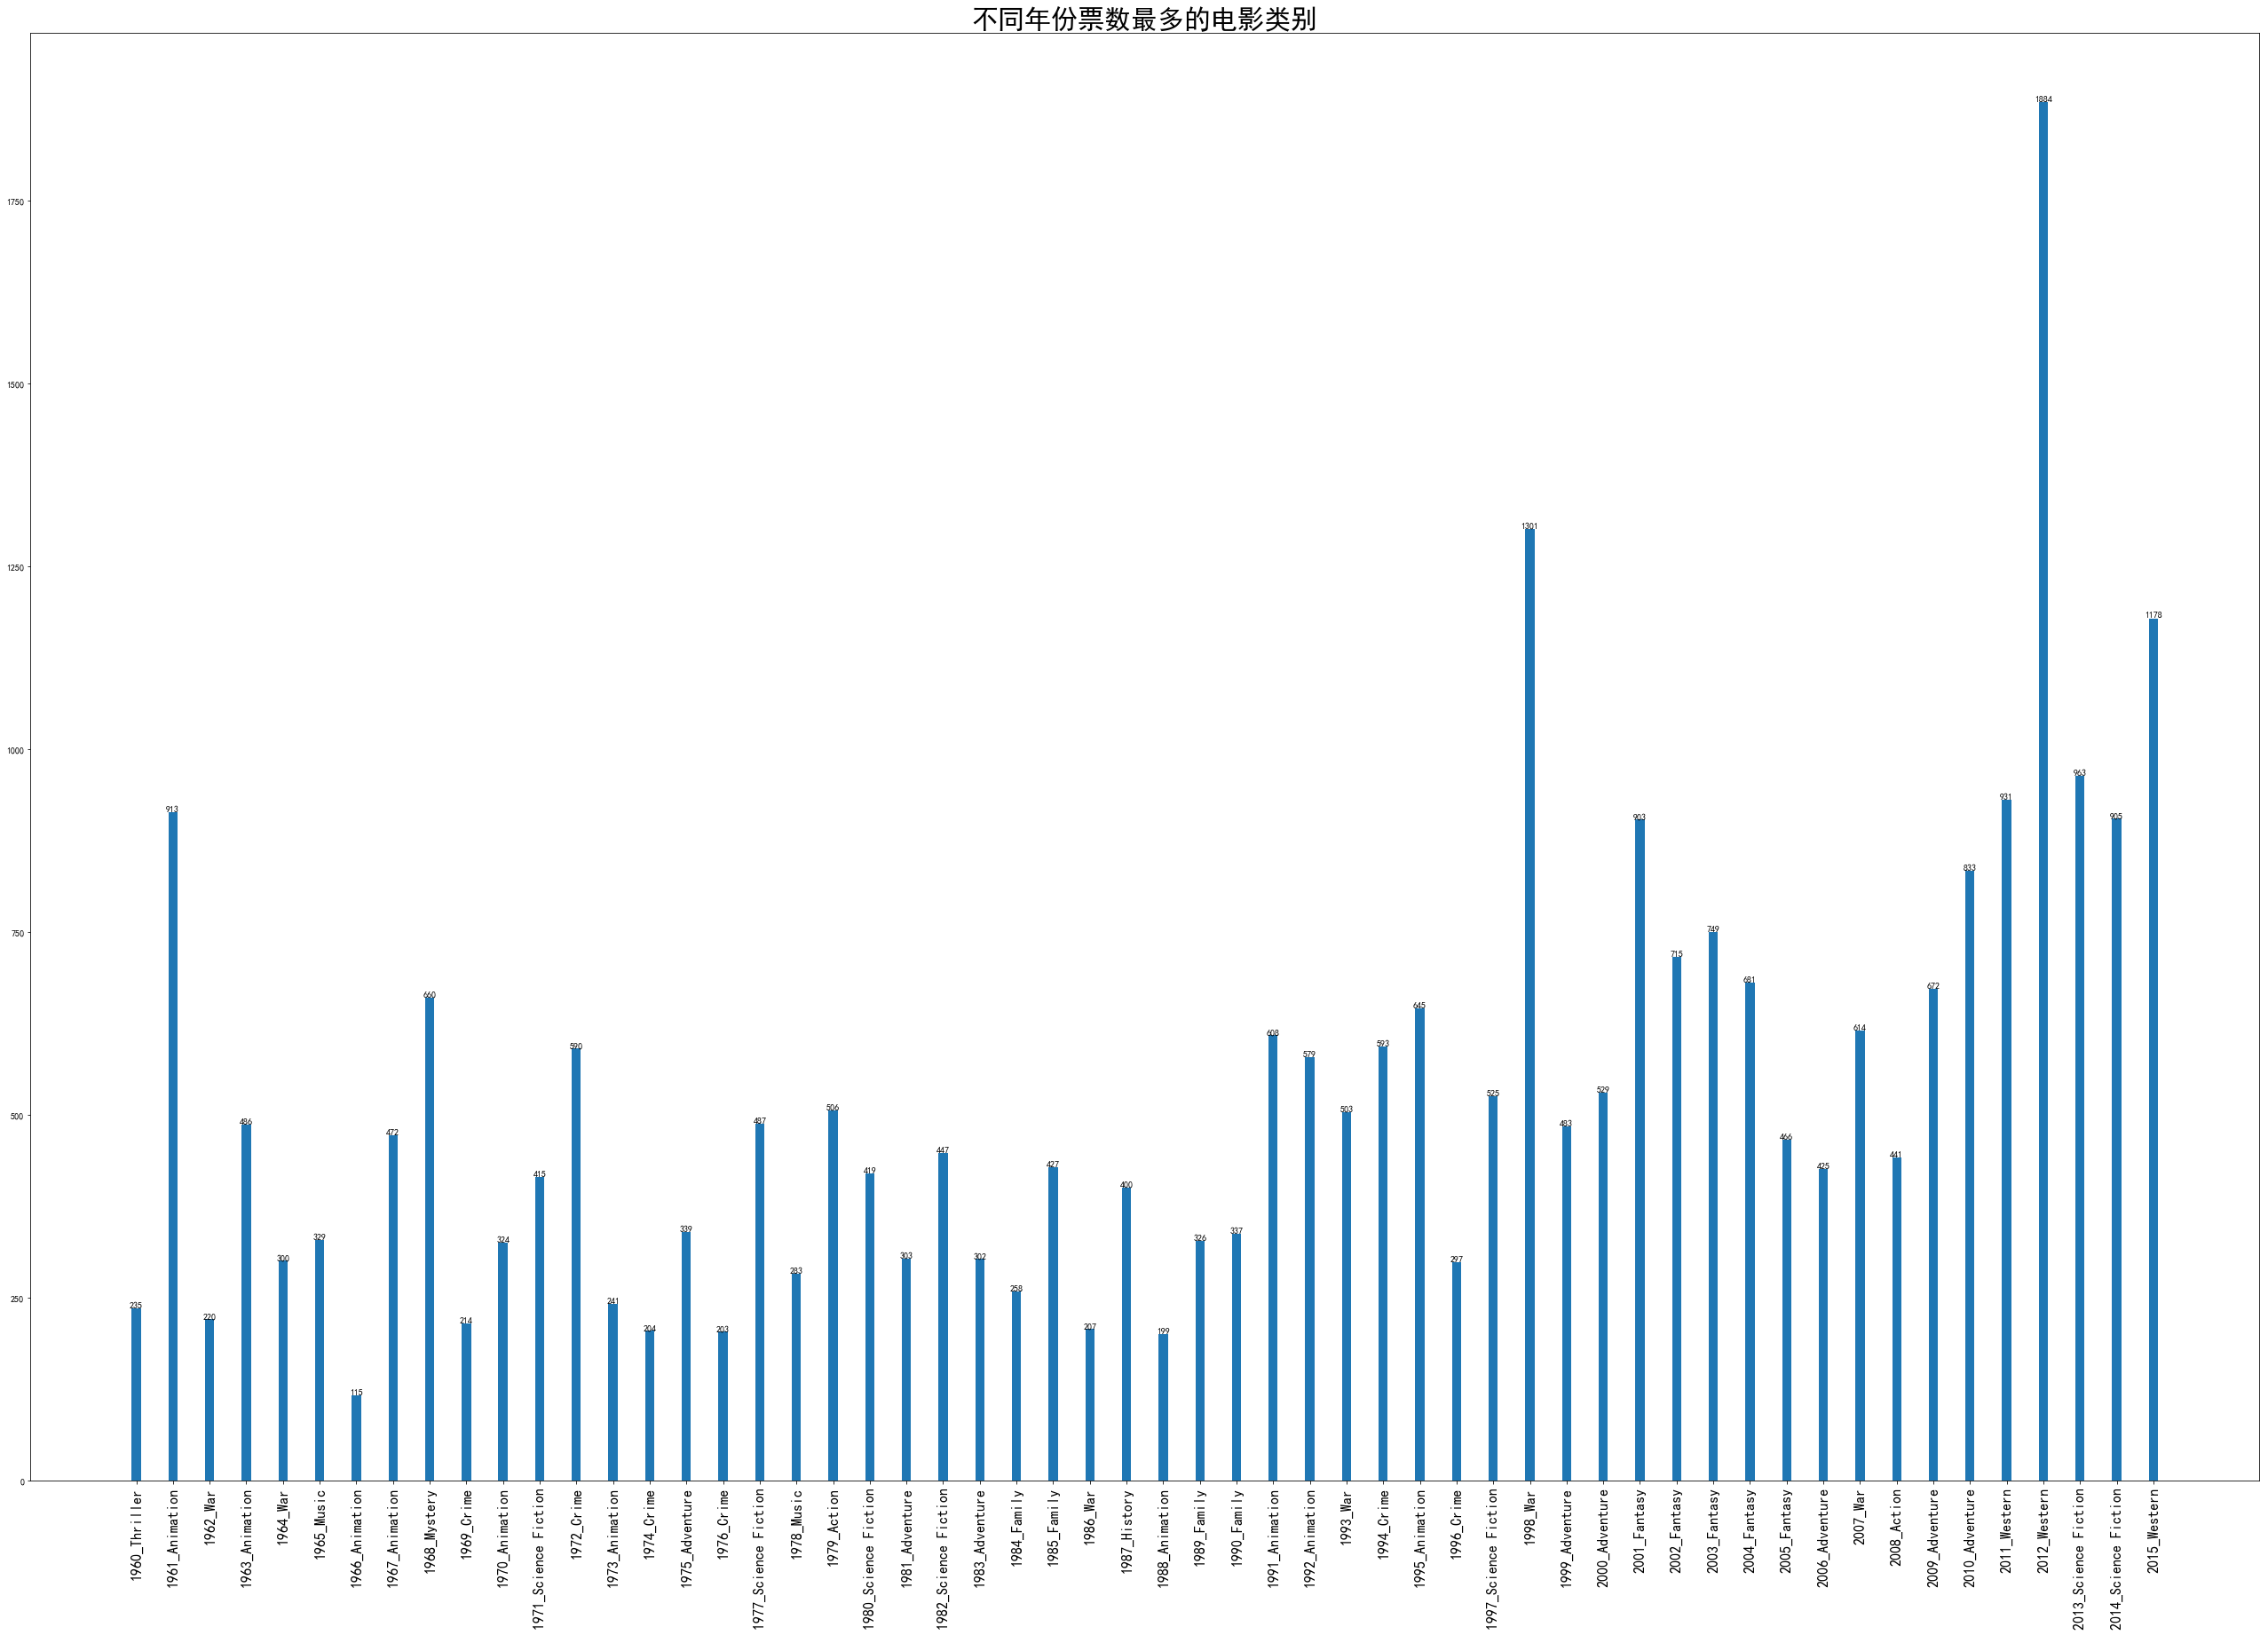

In [315]:
#图像绘制
x=np.arange(len(release_year))
width=0.25
#这里是设置成可以中文显示标题、坐标轴等
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
fig,ax=plt.subplots(figsize=(45,30))

#横坐标倾斜90度
plt.xticks(fontsize=16, rotation=90)
b=ax.bar(x,vote_count,width,tick_label=df_welcome['label'])

for i in b:
    h=i.get_height()
    ax.text(i.get_x()+i.get_width()/2,h,'%d'%int (h),ha='center',va='bottom')
plt.title('不同年份票数最多的电影类别',fontsize=30)
plt.show()

In [ ]:
从上图可得知，不同年份票数最多的电影类别，其中在2012Western是最大，在不同年份票数最多的电影类别也不太一样

Text(0,0.5,'次数')

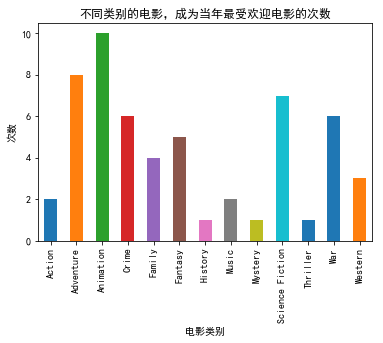

In [316]:
df_genres_populra_number.plot(kind='bar',title='不同类别的电影，成为当年最受欢迎电影的次数')
plt.xlabel('电影类别')
plt.ylabel('次数')

In [ ]:
结论：从上图可得知，Adventure、Animation、Science Fiction、War相对于其他电影类别，在1960-2014年间成为最受欢迎电影的次数较多

In [317]:
# 请继续探索数据，解决你额外的研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。

In [318]:
n=np.arange(len(df_invest['genres']))

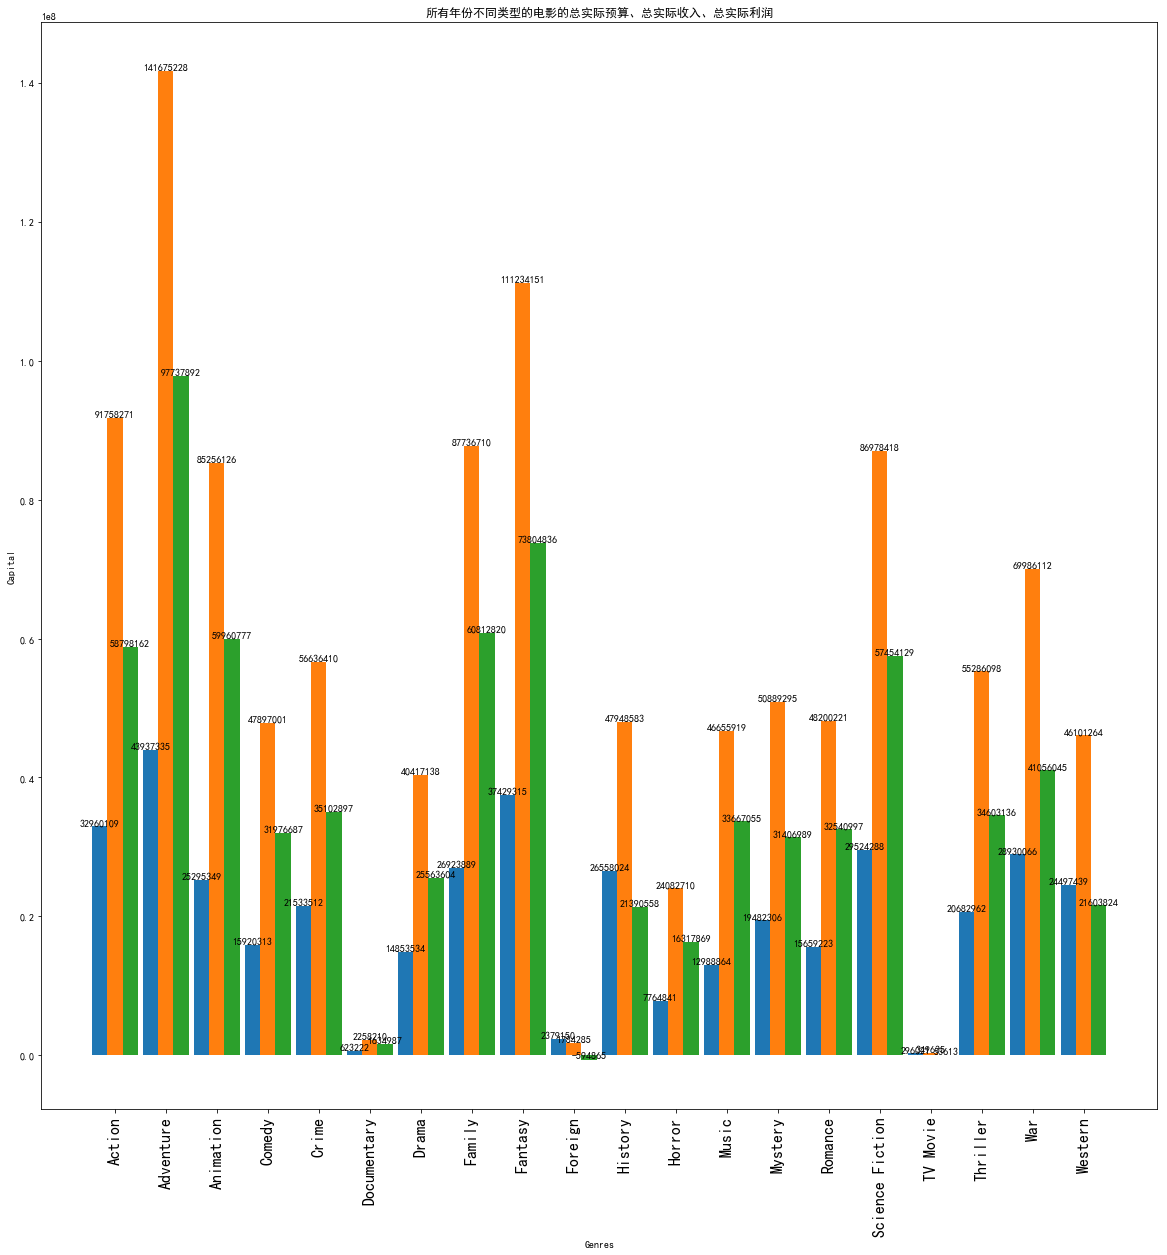

In [319]:
width=0.3
fig,ax=plt.subplots(figsize=(20,20))
plt.xticks(fontsize=16, rotation=90)
b1=ax.bar(n-width,df_invest['budget_adj'],width)
b2=ax.bar(n,df_invest['revenue_adj'],width,tick_label=df_invest['genres'])
b3=ax.bar(n+width,df_invest['profit_adj'],width)

for b in b1+b2+b3:
    h=b.get_height()
    ax.text(b.get_x()+b.get_width()/2,h,'%d'%int (h),ha='center',va='bottom')

plt.xlabel('Genres')
plt.ylabel('Capital')
plt.title('所有年份不同类型的电影的总实际预算、总实际收入、总实际利润')
plt.show()

In [ ]:
结论：从上图可得知，Adventrue、Fantasy的利润相对其他电影大

Text(0.5,1,'电影数量随年份的变化')

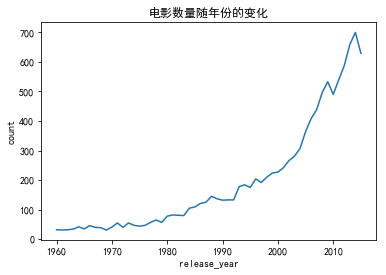

In [320]:
#修正
#不同年份电影数量的变化
df.groupby(['release_year'])['id'].count().plot()
plt.ylabel('count')
plt.title('电影数量随年份的变化')

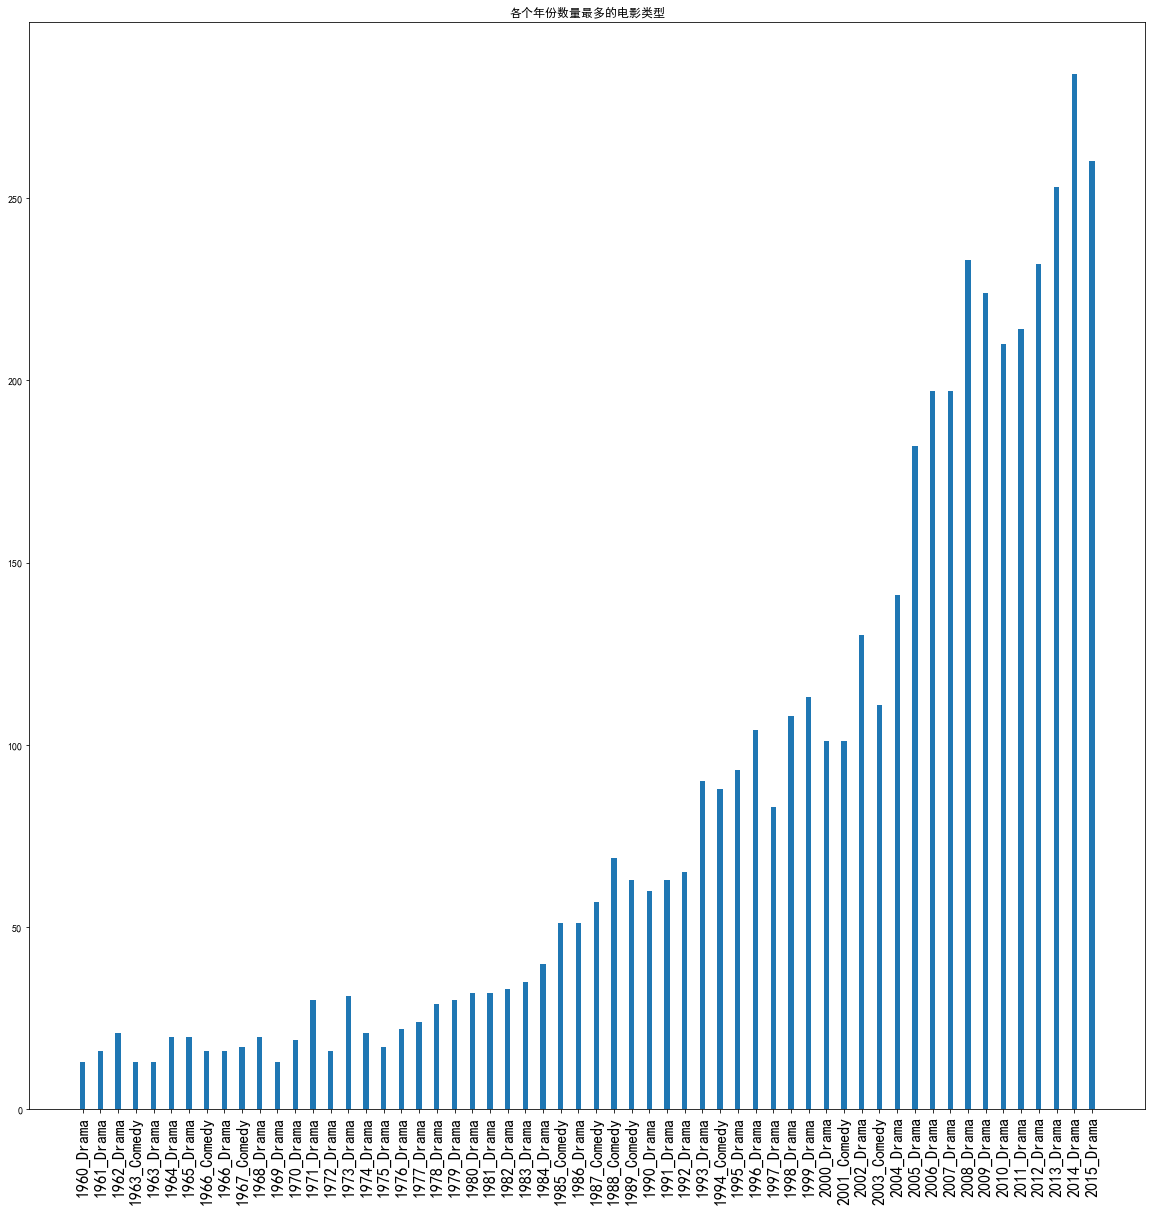

In [321]:
fig,ax=plt.subplots(figsize=(20,20))
#横坐标倾斜90度
plt.xticks(fontsize=16, rotation=90)
ax.bar(np.arange(len(df_genres_max_number['genres'])),df_genres_max_number['id'],width=width,tick_label=df_genres_max_number['year_genres'])
plt.title('各个年份数量最多的电影类型')
plt.show()

In [ ]:
结论：很有趣的现象，在这1960-2014年间，Drana电影类别出产数量基本都是比较多，也侧面说明了竞争激烈

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

结论：
    
    1）从上述的图形和处理完的数据集（df_welcome）中可以看出不同年份最受欢迎的电影类别，其中Action、Family、Adventrue类型的电影更瘦观众喜爱。
    
    2）根据图形可得知，投资Adventre、Fantasy获利比其他类型的电影更多，也正好与结论1）相照应，特别是Adventrue、Family类型的电影。为了保险起见，投资Adventrue获利是最多的
    
不利因素：

    1）经过处理后，样本有效数量8764条，样本数据不算很大
    
    2）在处理过程，还需要更多考虑实际情况，因为不同年代，看电影的新生人群都不一样，群众对电影更具有挑剔性，而且我们只是分析了票数这一项数据作为最受欢迎，不具有全面性。我建议是分析多几列不同标签的数据，采取加权平均的方式，这样的数据更准确

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

In [322]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295